In [1]:

from google.colab import drive
drive.mount('/content/gdrive')
import sys
sys.path.append('/content/gdrive/MyDrive/math156')

Mounted at /content/gdrive


In [17]:

# python libraries
import os
import time

# numpy libraries
import numpy as np

# matplotlib libraries
import matplotlib.pyplot as plt

import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [59]:
# a)

redw = pd.read_csv('/content/gdrive/MyDrive/math156/winequality-red.csv', sep=';')

In [7]:
redw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [60]:
# b)

# define X and y
X = redw.drop('quality', axis=1)  # all features
y = redw['quality'] # quality as response variable

X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.4, random_state=42) # split the data to get training dataset
x_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42) # split the remaining to get validation and test datasets

In [61]:
# c)


scale = StandardScaler()
X_train = scale.fit_transform(X_train)
x_val = scale.transform(x_val)
X_test = scale.transform(X_test)

# add intercept
X_train_one = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_one = np.c_[np.ones(X_test.shape[0]), X_test]
# solve w from normal eq.
w = np.linalg.inv(X_train_one.T @ X_train_one) @ X_train_one.T @ y_train

# make predictions
y_train_p = X_train_one@ w
y_test_p = X_test_one @ w

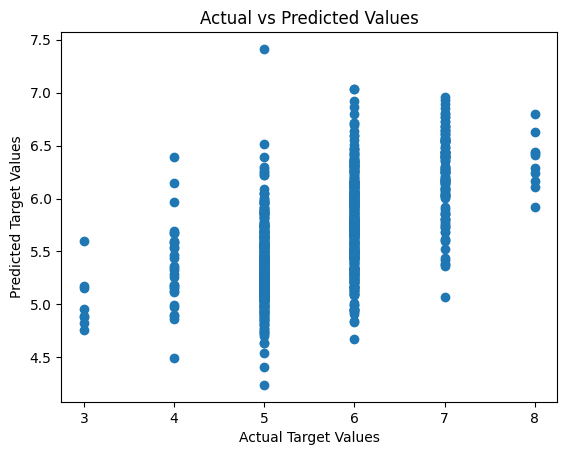

In [62]:
# d)

# plot of the actual target values vs predicted target values
plt.scatter(y_train, y_train_p)
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Actual vs Predicted Values')

plt.show()

According to the graph, when the actual quality is 3 or 8, the ranges of the predicted qualites do not vary too much, just between around 4.7 to 5.6 and around 5.9 to 6.7 respectively. The predicted quality varies the most when the actual value is 5 with a potential outlier at 7.5 and a range of around 4.1 to 7.5. When the actual quality is 6 or 7, the predicted qualites are concentrated between around 4.6 to 7.0 and around 5.0 to 7.0 respectively. Also, when the actual quality is 4, the predicted qualites are sparsely located between around 4.5 to 6.4.

In [63]:
# e)

# func to compute RMSE
def rmse(y_true, y_pred):
    num = len(y_true)  # num of data
    squared_e = (y_true - y_pred) ** 2  # squared errors
    mean_squared_e = sum(squared_e) / num
    rmse = np.sqrt(mean_squared_e)
    return rmse

# RMSE for train and test datasets
rmse_train = rmse(y_train, y_train_p)
rmse_test = rmse(y_test, y_test_p)

print(f"Train RMSE: {rmse_train}")
print(f"Test RMSE: {rmse_test}")


Train RMSE: 0.6435674112932497
Test RMSE: 0.6836335915866051


In [64]:
w_0 = np.random.randn(X_train_one.shape[1])  # initialize w_0

lr = 0.001 # learning rate
num_epochs = 2000
n = len(y_train)

# apply SGD
for epoch in range(num_epochs):
    # shuffle indices of the training data
    shuffled_indices = np.random.permutation(n)
    X_shuffled = X_train_one[shuffled_indices]
    y_shuffled = y_train.iloc[shuffled_indices].values

    # iter through all training in shuffled data
    for idx in range(n):
        X_sample = X_shuffled[idx, :]  # choose one sample
        y_sample = y_shuffled[idx]

        # prediction
        y_train_pred_lms = X_sample @ w_0

        error = y_train_pred_lms - y_sample

        # update weights
        w_0 -= lr * error * X_sample

# prediction with final weights
y_test_pred_lms = X_test_one @ w_0


In [65]:
# g)

#rmse for lms
rmse_train_lms = rmse(y_train, y_train_pred_lms)
rmse_test_lms = rmse(y_test, y_test_pred_lms)

print(f"Train RMSE for LMS: {rmse_train_lms}")
print(f"Test RMSE for LMS: {rmse_test_lms}")

Train RMSE for LMS: 0.9363247978021022
Test RMSE for LMS: 0.6864548250344682
